In [30]:
import pandas as pd 

In [31]:
test = pd.read_csv('test.csv')

In [32]:
sample = pd.read_csv('sample_submission.csv')

In [33]:
train = pd.read_csv('train.csv')

In [34]:
print("전체 행 개수 :", len(train))
print(train.isna().sum())          

전체 행 개수 : 1200000
id                           0
Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64


In [35]:
train1 = train.dropna()
print("결측 제거 후 행 개수 :", len(train1))

print(train1.isna().sum())

결측 제거 후 행 개수 : 384004
id                      0
Age                     0
Gender                  0
Annual Income           0
Marital Status          0
Number of Dependents    0
Education Level         0
Occupation              0
Health Score            0
Location                0
Policy Type             0
Previous Claims         0
Vehicle Age             0
Credit Score            0
Insurance Duration      0
Policy Start Date       0
Customer Feedback       0
Smoking Status          0
Exercise Frequency      0
Property Type           0
Premium Amount          0
dtype: int64


In [36]:
train[train['Occupation'] == 'Employed']['Annual Income'].mean()

np.float64(32747.057258707253)

In [37]:
train[train['Occupation'] == 'Unemployed']['Annual Income'].mean()

np.float64(32864.541819657774)

In [38]:
train[train['Occupation'] == 'Self-Employed']['Annual Income'].mean()

np.float64(32909.187328502594)

In [39]:
train1 = train.copy()
train1['Occupation'] = train1['Occupation'].fillna('Unknown')
train1['Previous Claims'] = train1['Previous Claims'].fillna(0)


In [40]:
train1.head(5)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,Unknown,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,Unknown,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [41]:
train1 = train1.dropna()
print("결측 제거 후 행 개수 :", len(train1))

print(train1.isna().sum())

결측 제거 후 행 개수 : 790332
id                      0
Age                     0
Gender                  0
Annual Income           0
Marital Status          0
Number of Dependents    0
Education Level         0
Occupation              0
Health Score            0
Location                0
Policy Type             0
Previous Claims         0
Vehicle Age             0
Credit Score            0
Insurance Duration      0
Policy Start Date       0
Customer Feedback       0
Smoking Status          0
Exercise Frequency      0
Property Type           0
Premium Amount          0
dtype: int64


# 결측치 제거 

In [55]:
import numpy as np


# 결측 플래그 생성
train['Number_of_Dependents_missing'] = train['Number of Dependents'].isnull().astype(int)


# 구간화 예시 (0명, 1~2명, 3명 이상)
bins = [-np.inf, 0, 2, np.inf]
labels = ['0', '1-2', '3+']
train['Number_of_Dependents_bin'] = pd.cut(train['Number of Dependents'], bins=bins, labels=labels)

In [56]:
# 나이에 대한 결측 플래그 및 중앙값 대체 예시
train['Age_missing'] = train['Age'].isnull().astype(int)
train['Age'] = train['Age'].fillna(train['Age'].median())


# Annual Income
train['Annual_Income_missing'] = train['Annual Income'].isnull().astype(int)
train['Annual Income'] = train['Annual Income'].fillna(train['Annual Income'].median())


# Health Score
train['Health_Score_missing'] = train['Health Score'].isnull().astype(int)
train['Health Score'] = train['Health Score'].fillna(train['Health Score'].median())


# Credit Score
train['Credit_Score_missing'] = train['Credit Score'].isnull().astype(int)
train['Credit Score'] = train['Credit Score'].fillna('Missing')


# Customer Feedback
train['Customer_Feedback_missing'] = train['Customer Feedback'].isnull().astype(int)

train['Customer Feedback'] = train['Customer Feedback'].fillna('No Feedback')


In [44]:
# Vehicle Age 결측 행 삭제
train = train[train['Vehicle Age'].notnull()]

# Insurance Duration 결측 행 삭제
train = train[train['Insurance Duration'].notnull()]


In [45]:
train

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Exercise Frequency,Property Type,Premium Amount,Number_of_Dependents_missing,Number_of_Dependents_bin,Age_missing,Annual_Income_missing,Health_Score_missing,Credit_Score_missing,Customer_Feedback_missing
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,Weekly,House,2869.0,0,1-2,0,0,0,0,0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,Monthly,House,1483.0,0,3+,0,0,0,0,0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,Weekly,House,567.0,0,3+,0,0,0,1,0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,Daily,Apartment,765.0,0,1-2,0,0,0,0,0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,Weekly,House,2022.0,0,1-2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,1199995,36.0,Female,27316.0,Married,0.0,Master's,Unemployed,13.772907,Urban,...,Daily,Apartment,1303.0,0,0,0,0,0,0,0
1199996,1199996,54.0,Male,35786.0,Divorced,NaN,Master's,Self-Employed,11.483482,Rural,...,Weekly,Apartment,821.0,1,NaN,0,0,0,0,0
1199997,1199997,19.0,Male,51884.0,Divorced,0.0,Master's,NaN,14.724469,Suburban,...,Monthly,Condo,371.0,0,0,0,0,0,1,0
1199998,1199998,55.0,Male,23911.0,Single,1.0,PhD,NaN,18.547381,Suburban,...,Daily,Apartment,596.0,0,1-2,0,1,0,0,0


In [48]:
print(train1.isna().sum())
print("결측 제거 후 행 개수 :", len(train1))

id                      0
Age                     0
Gender                  0
Annual Income           0
Marital Status          0
Number of Dependents    0
Education Level         0
Occupation              0
Health Score            0
Location                0
Policy Type             0
Previous Claims         0
Vehicle Age             0
Credit Score            0
Insurance Duration      0
Policy Start Date       0
Customer Feedback       0
Smoking Status          0
Exercise Frequency      0
Property Type           0
Premium Amount          0
dtype: int64
결측 제거 후 행 개수 : 790332


# 타입 별 상관계수 찍어보기 

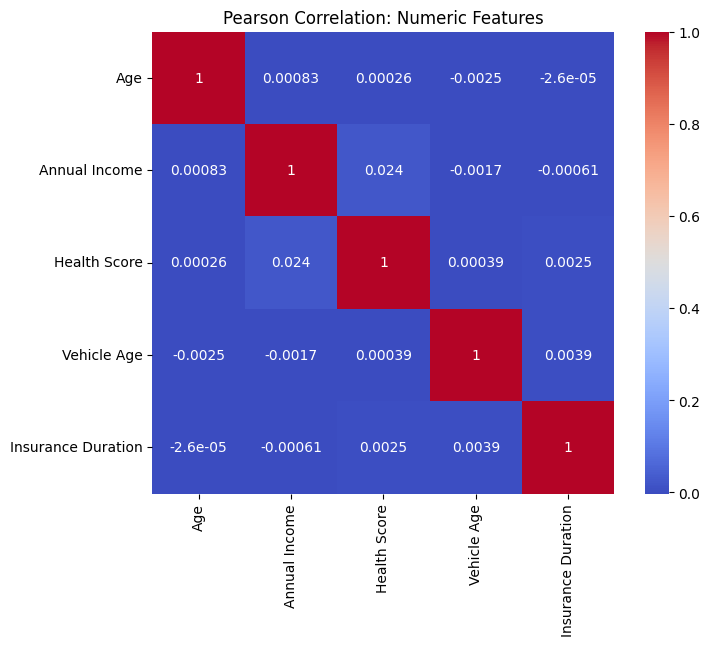

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['Age', 'Annual Income', 'Health Score', 'Vehicle Age', 'Insurance Duration']
corr = train1[num_cols].corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)
plt.title('Pearson Correlation: Numeric Features')
plt.show()


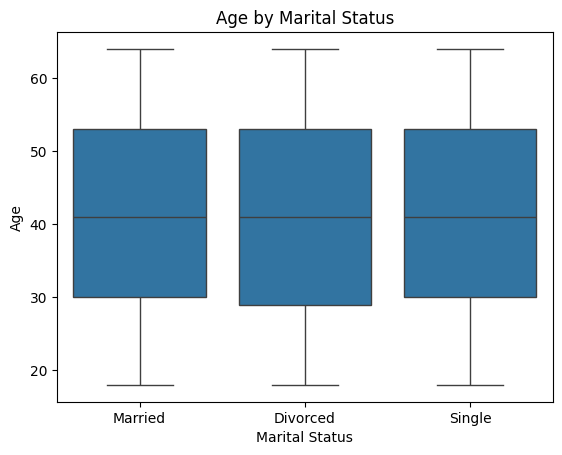

ANOVA p-value: 0.08002912751724553


In [57]:
import scipy.stats as stats

# 예: Marital Status별 Age 비교
sns.boxplot(x='Marital Status', y='Age', data=train1)
plt.title('Age by Marital Status')
plt.show()

# ANOVA 통계 검정
grouped = [train1.loc[train1['Marital Status'] == g, 'Age'].dropna() for g in train1['Marital Status'].unique()]
anova_result = stats.f_oneway(*grouped)
print('ANOVA p-value:', anova_result.pvalue)


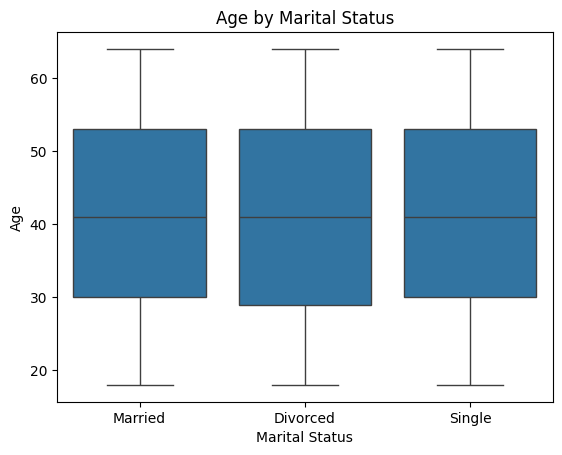

ANOVA p-value: 0.08002912751724553


In [58]:
import scipy.stats as stats

# 예: Marital Status별 Age 비교
sns.boxplot(x='Marital Status', y='Age', data=train1)
plt.title('Age by Marital Status')
plt.show()

# ANOVA 통계 검정
grouped = [train1.loc[train1['Marital Status'] == g, 'Age'].dropna() for g in train1['Marital Status'].unique()]
anova_result = stats.f_oneway(*grouped)
print('ANOVA p-value:', anova_result.pvalue)


In [64]:
import numpy as np
# 결측 플래그 생성
train['Number_of_Dependents_missing'] = train['Number of Dependents'].isnull().astype(int)
# 구간화 예시 (0명, 1~2명, 3명 이상)
bins = [-np.inf, 0, 2, np.inf]
labels = ['0', '1-2', '3+']
train['Number_of_Dependents_bin'] = pd.cut(train['Number of Dependents'], bins=bins, labels=labels)
# 나이에 대한 결측 플래그 및 중앙값 대체 예시
train['Age_missing'] = train['Age'].isnull().astype(int)
train['Age'] = train['Age'].fillna(train['Age'].median())
# Annual Income
train['Annual_Income_missing'] = train['Annual Income'].isnull().astype(int)
train['Annual Income'] = train['Annual Income'].fillna(train['Annual Income'].median())
# Health Score
train['Health_Score_missing'] = train['Health Score'].isnull().astype(int)
train['Health Score'] = train['Health Score'].fillna(train['Health Score'].median())
# Credit Score
train['Credit_Score_missing'] = train['Credit Score'].isnull().astype(int)
train['Credit Score'] = train['Credit Score'].fillna('Missing')
# Customer Feedback
train['Customer_Feedback_missing'] = train['Customer Feedback'].isnull().astype(int)
train['Customer Feedback'] = train['Customer Feedback'].fillna('No Feedback')
# Vehicle Age 결측 행 삭제
train = train[train['Vehicle Age'].notnull()]
# Insurance Duration 결측 행 삭제
train = train[train['Insurance Duration'].notnull()]

C:\Users\com\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


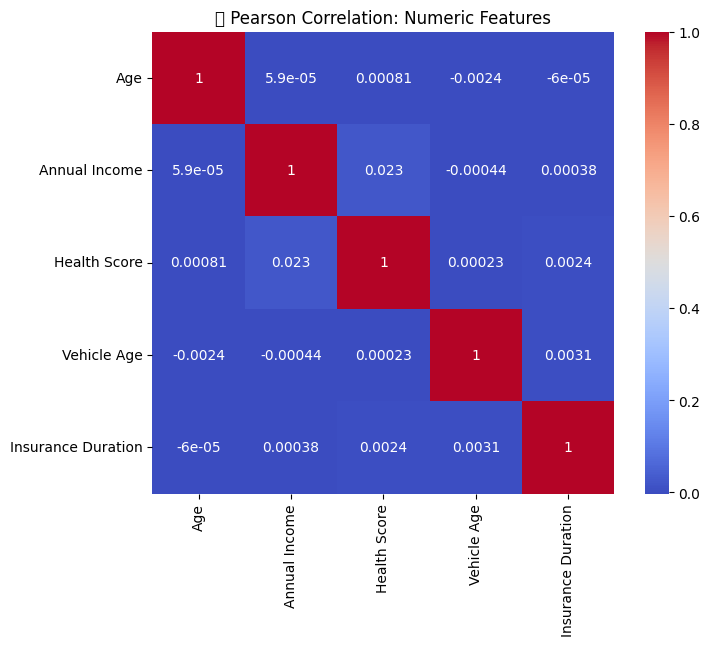

C:\Users\com\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


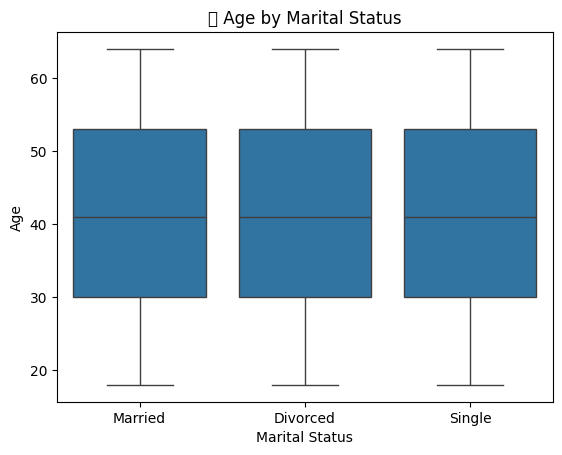

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_18760\629099222.py:38: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  anova_result = stats.f_oneway(*grouped)


ANOVA p-value: nan
Chi2-test p-value: 0.8108995189145403
Cramér’s V: 0.000819853758634712


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_18760\629099222.py:61: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\com\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


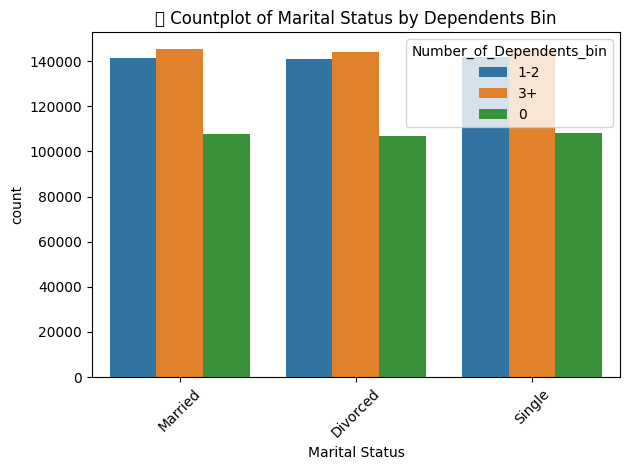

ValueError: Input X contains NaN.

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder


# 전처리: Number_of_Dependents_bin 생성
train['Number of Dependents'] = train['Number of Dependents'].fillna(0)
def bin_dependents(x):
   if x == 0:
       return '0'
   elif x <= 2:
       return '1-2'
   else:
       return '3+'
train['Number_of_Dependents_bin'] = train['Number of Dependents'].apply(bin_dependents)


# 1) 수치형 간 Pearson 상관분석
num_cols = ['Age', 'Annual Income', 'Health Score', 'Vehicle Age', 'Insurance Duration']
corr = train[num_cols].corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)
plt.title('📊 Pearson Correlation: Numeric Features')
plt.show()


# 2) 범주형-수치형 분석: Boxplot + ANOVA
sns.boxplot(x='Marital Status', y='Age', data=train)
plt.title('🎯 Age by Marital Status')
plt.show()


grouped = [train.loc[train['Marital Status'] == g, 'Age'].dropna() for g in train['Marital Status'].unique()]
anova_result = stats.f_oneway(*grouped)
print('ANOVA p-value:', anova_result.pvalue)


# 3) 범주형-범주형 분석: 카이제곱 + Cramér’s V + Countplot
contingency = pd.crosstab(train['Marital Status'], train['Number_of_Dependents_bin'])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print('Chi2-test p-value:', p)


def cramers_v(conf_matrix):
   chi2 = stats.chi2_contingency(conf_matrix)[0]
   n = conf_matrix.sum().sum()
   r, k = conf_matrix.shape
   return np.sqrt(chi2 / (n * (min(r, k)-1)))


print("Cramér’s V:", cramers_v(contingency))


sns.countplot(data=train, x='Marital Status', hue='Number_of_Dependents_bin')
plt.title('📦 Countplot of Marital Status by Dependents Bin')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 4) Mutual Information 분석 (혼합형)
df_enc = train.copy()


# 범주형 변수 인코딩
for col in df_enc.select_dtypes(include=['object', 'category']).columns:
   df_enc[col] = LabelEncoder().fit_transform(df_enc[col].astype(str))


# Y값 (target 변수) 설정
y = df_enc['Premium Amount']  # ← target 변수명 필요 시 수정
X = df_enc.drop(columns=['Premium Amount'])


# Mutual Information 계산
mi = mutual_info_regression(X, y, discrete_features='auto')
mi_df = pd.DataFrame({'feature': X.columns, 'mutual_info': mi})
mi_df = mi_df.sort_values(by='mutual_info', ascending=False)


# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x='feature', y='mutual_info', data=mi_df)
plt.title('🧠 Mutual Information with Target')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


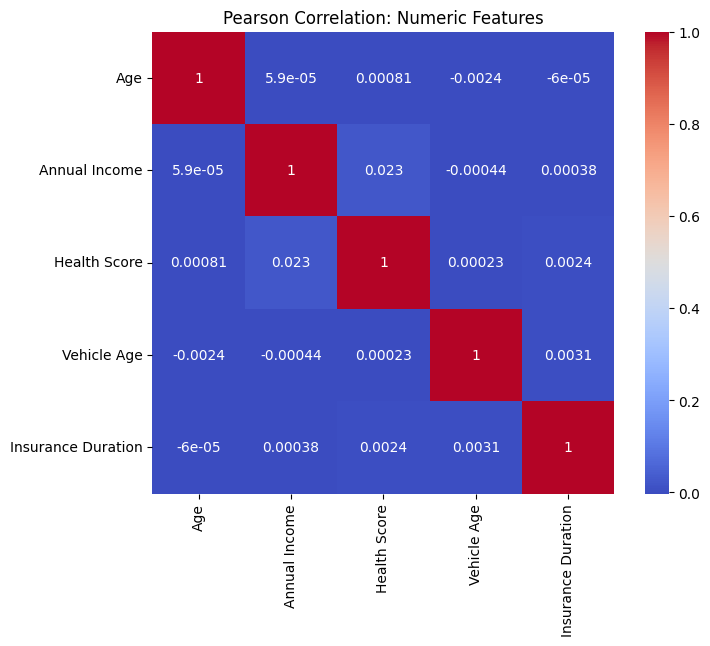

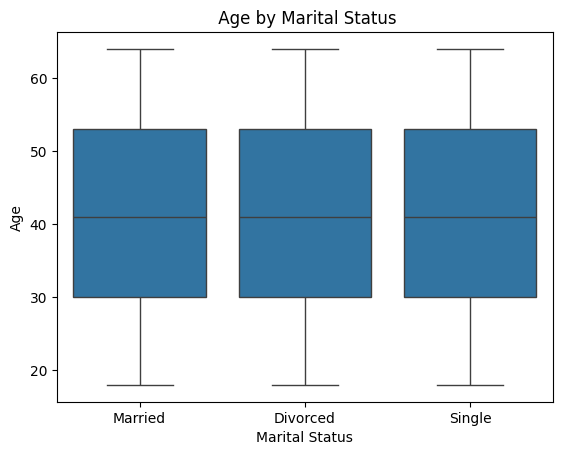

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_18760\2917393604.py:30: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  anova_result = stats.f_oneway(*grouped)


ANOVA p-value: nan
Chi2-test p-value: 0.8108995189145403
Cramér’s V: 0.000819853758634712


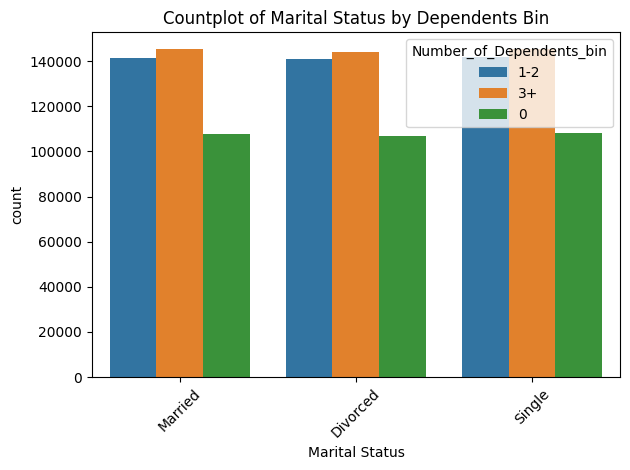

ValueError: Input X contains NaN.

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder
# 전처리: Number_of_Dependents_bin 생성
train['Number of Dependents'] = train['Number of Dependents'].fillna(0)
def bin_dependents(x):
    if x == 0:
        return '0'
    elif x <= 2:
        return '1-2'
    else:
        return '3+'
train['Number_of_Dependents_bin'] = train['Number of Dependents'].apply(bin_dependents)
# 1) 수치형 간 Pearson 상관분석
num_cols = ['Age', 'Annual Income', 'Health Score', 'Vehicle Age', 'Insurance Duration']
corr = train[num_cols].corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)
plt.title('Pearson Correlation: Numeric Features')
plt.show()
# 2) 범주형-수치형 분석: Boxplot + ANOVA
sns.boxplot(x='Marital Status', y='Age', data=train)
plt.title(' Age by Marital Status')
plt.show()
grouped = [train.loc[train['Marital Status'] == g, 'Age'].dropna() for g in train['Marital Status'].unique()]
anova_result = stats.f_oneway(*grouped)
print('ANOVA p-value:', anova_result.pvalue)
# 3) 범주형-범주형 분석: 카이제곱 + Cramér’s V + Countplot
contingency = pd.crosstab(train['Marital Status'], train['Number_of_Dependents_bin'])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print('Chi2-test p-value:', p)
def cramers_v(conf_matrix):
    chi2 = stats.chi2_contingency(conf_matrix)[0]
    n = conf_matrix.sum().sum()
    r, k = conf_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k)-1)))
print("Cramér’s V:", cramers_v(contingency))
sns.countplot(data=train, x='Marital Status', hue='Number_of_Dependents_bin')
plt.title('Countplot of Marital Status by Dependents Bin')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# 4) Mutual Information 분석 (혼합형)
df_enc = train.copy()
# 범주형 변수 인코딩
for col in df_enc.select_dtypes(include=['object', 'category']).columns:
    df_enc[col] = LabelEncoder().fit_transform(df_enc[col].astype(str))
# Y값 (target 변수) 설정
y = df_enc['Premium Amount']  # ← target 변수명 필요 시 수정
X = df_enc.drop(columns=['Premium Amount'])
# Mutual Information 계산
mi = mutual_info_regression(X, y, discrete_features='auto')
mi_df = pd.DataFrame({'feature': X.columns, 'mutual_info': mi})
mi_df = mi_df.sort_values(by='mutual_info', ascending=False)
# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x='feature', y='mutual_info', data=mi_df)
plt.title('Mutual Information with Target')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [61]:
import pandas as pd
import scipy.stats as stats
import numpy as np

contingency = pd.crosstab(train['Marital Status'], train['Number_of_Dependents_bin'])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print('Chi2-test p-value:', p)

# Cramér’s V
def cramers_v(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k)-1)))
print('Cramér’s V:', cramers_v(contingency))

# 카운트플롯 시각화
sns.countplot(data=train1, x='Marital Status', hue='Number_of_Dependents_bin')
plt.title('Countplot of Marital Status by Number of Dependents Bin')
plt.show()



Chi2-test p-value: 0.31883078567551987
Cramér’s V: 0.001480369823307322


ValueError: Could not interpret value `Number_of_Dependents_bin` for `hue`. An entry with this name does not appear in `data`.

In [ ]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # 1) 수치형 컬럼 리스트 만들기
# num_cols = [
#     'Age', 'Annual Income', 'Number of Dependents', 'Health Score',
#     'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration',
#     'Premium Amount'
# ]

# # 2) 상관행렬 계산
# corr_matrix = train[num_cols].corr()

# # 3) 상관행렬 출력
# print(corr_matrix)

# # 4) 히트맵으로 시각화
# plt.figure(figsize=(10,8))
# sns.heatmap(corr_matrix, 
#             annot=True,       # 각 셀에 상관계수 보여주기
#             fmt=".2f",        # 소수점 둘째 자리까지
#             cmap="coolwarm",  # 차가운-따뜻한 색상 맵
#             square=True)
# plt.title("Numeric Feature Correlation Matrix")
# plt.tight_layout()
# plt.show()


ValueError: could not convert string to float: 'Missing'